In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%config InlineBackend.figure_formats = ['retina']
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from scipy import stats

In [2]:
info_patents = pd.read_pickle('../new_info_patents')
info_companies = pd.read_csv('./Data/new_info_companies.csv')

In [3]:
info_companies.drop(columns = [info_companies.columns.values[0]], inplace = True)

In [4]:
stat_columns = ["assignee_id", "assignee_lastknown_country", "assignee_total_num_patents", "assignee_total_num_inventors", "proportion_marked_patents", "proportion_multi_ipc", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]
interest_info_companies = info_companies[stat_columns]

# OLS Regressions

## simplistic linear model without entity fixed effects

In [5]:
reg_companies = interest_info_companies[["assignee_total_num_patents", "assignee_total_num_inventors", "proportion_marked_patents", "proportion_multi_ipc", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
model = sm.OLS(reg_companies.proportion_marked_patents, reg_companies.drop('proportion_marked_patents', axis = 1))
result = model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.110
Model:                                   OLS   Adj. R-squared:                  0.104
Method:                        Least Squares   F-statistic:                       nan
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):                nan
Time:                               13:45:30   Log-Likelihood:                -14.383
No. Observations:                       1695   AIC:                             50.77
Df Residuals:                           1684   BIC:                             110.6
Df Model:                                 10                                         
Covariance Type:                         hc0                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

In [48]:
vif = pd.DataFrame()
vif["variables"] = reg_companies.columns
vif["VIF"] = [variance_inflation_factor(reg_companies.values, i) for i in range(reg_companies.shape[1])]
vif

,variables,VIF
0,assignee_total_num_patents,8.318907
1,assignee_total_num_inventors,8.425058
2,proportion_marked_patents,1.123104
3,proportion_multi_ipc,1.126157
4,proportion_A_ipc,1.461959
5,proportion_B_ipc,1.381038
6,proportion_C_ipc,1.500389
7,proportion_D_ipc,1.075185
8,proportion_E_ipc,1.077322
9,proportion_F_ipc,1.192314


## work on non-linearity dependencies

### logarithmic dependencies for total number of patents/inventors

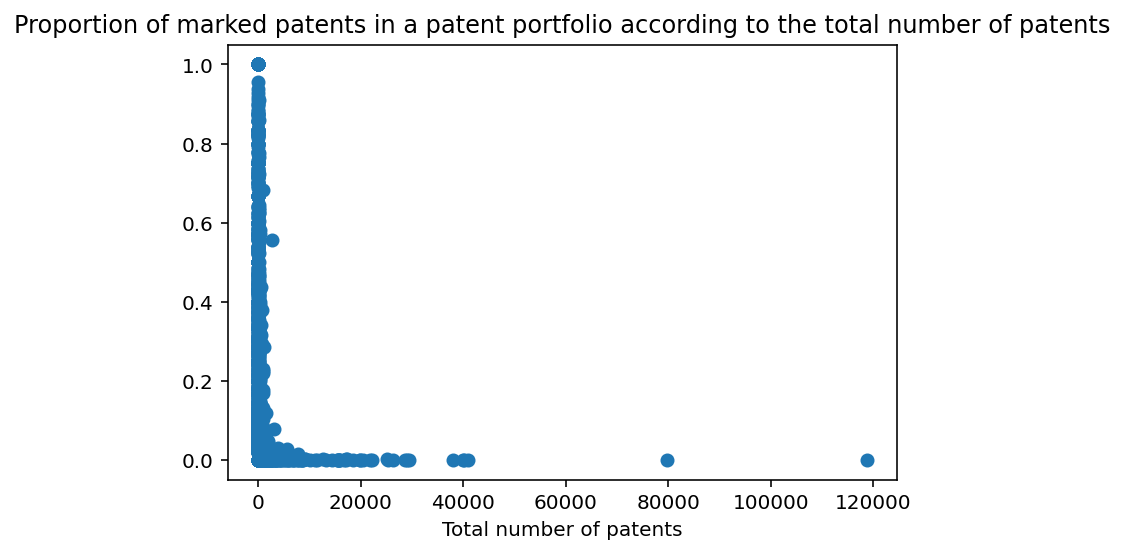

In [10]:
plt.scatter(reg_companies.assignee_total_num_patents, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel('Total number of patents')
plt.title('Proportion of marked patents in a patent portfolio according to the total number of patents')
plt.show()

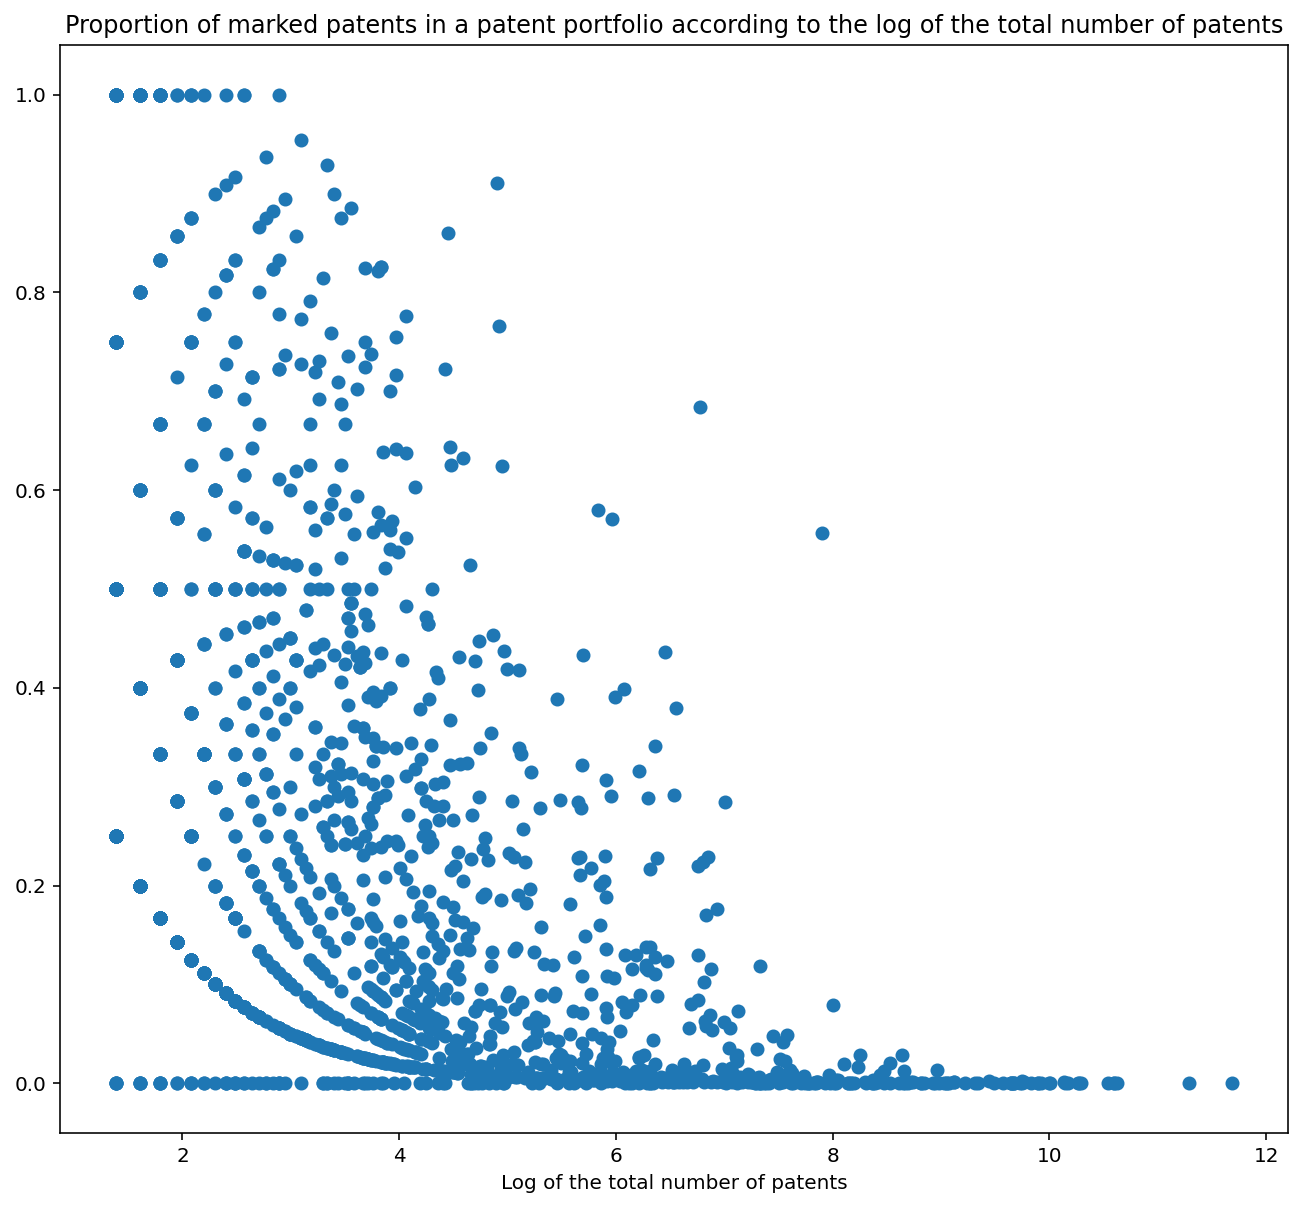

In [111]:
plt.scatter(np.log(reg_companies.assignee_total_num_patents), reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel('Log of the total number of patents')
plt.title('Proportion of marked patents in a patent portfolio according to the log of the total number of patents')
plt.rcParams["figure.figsize"] = (9,10)
plt.show()

In [87]:
log_sqrt_companies = reg_companies[["proportion_marked_patents"]]
log_sqrt_companies["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
log_sqrt_companies["inv_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
log_sqrt_companies= sm.add_constant(log_sqrt_companies)
log_patents_model = sm.OLS(log_sqrt_companies.proportion_marked_patents, log_sqrt_companies.drop('proportion_marked_patents', axis = 1))
result = log_patents_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.278
Model:                                   OLS   Adj. R-squared:                  0.277
Method:                        Least Squares   F-statistic:                     537.6
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):          1.79e-181
Time:                               18:28:36   Log-Likelihood:                 163.35
No. Observations:                       1695   AIC:                            -320.7
Df Residuals:                           1692   BIC:                            -304.4
Df Model:                                  2                                         
Covariance Type:                         hc0                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

<ipython-input-87-84dd371f1215>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_sqrt_companies["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
<ipython-input-87-84dd371f1215>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_sqrt_companies["inv_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))


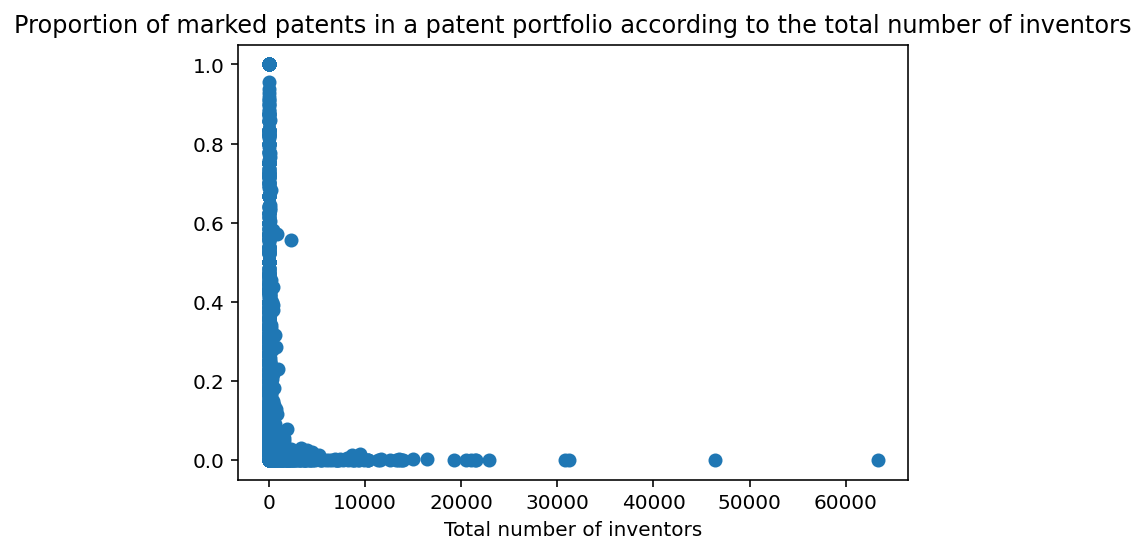

In [27]:
plt.scatter(reg_companies.assignee_total_num_inventors, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel('Total number of inventors')
plt.title('Proportion of marked patents in a patent portfolio according to the total number of inventors')
plt.show()

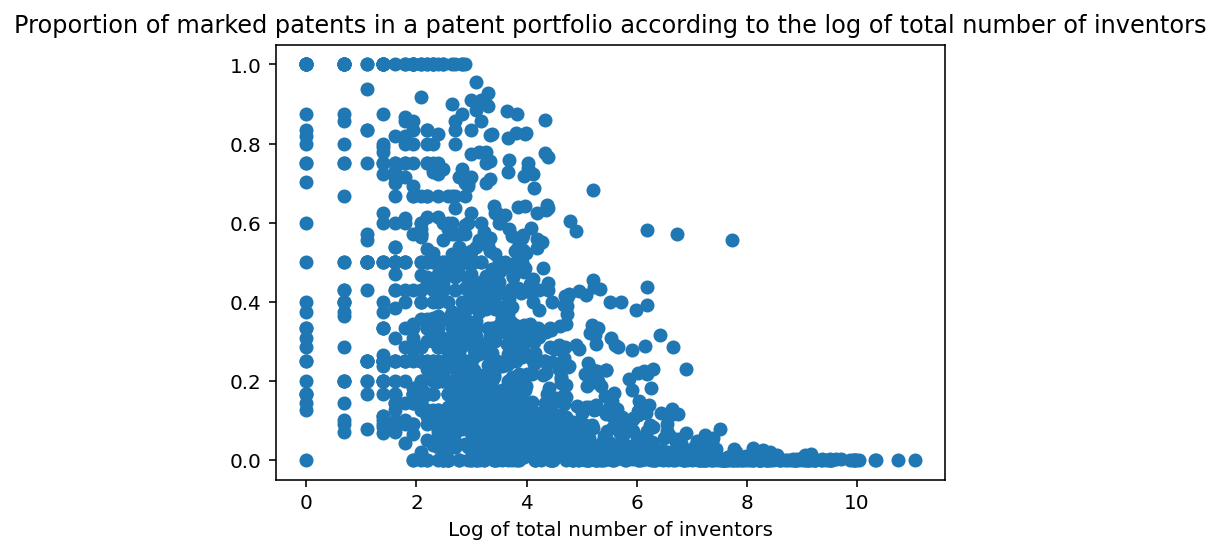

In [32]:
plt.scatter(np.log(reg_companies.assignee_total_num_inventors), reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel('Log of total number of inventors')
plt.title('Proportion of marked patents in a patent portfolio according to the log of total number of inventors')
plt.show()

In [35]:
log_sqrt_inventors = reg_companies[["proportion_marked_patents"]]
log_sqrt_inventors["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
log_sqrt_inventors["sqrt_log_assignee_total_num_inventors"] = np.sqrt(np.log(reg_companies.assignee_total_num_inventors))
log_sqrt_inventors= sm.add_constant(log_sqrt_inventors)
log_inventors_model = sm.OLS(log_sqrt_inventors.proportion_marked_patents, log_sqrt_inventors.drop('proportion_marked_patents', axis = 1))
result = log_inventors_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.315
Model:                                   OLS   Adj. R-squared:                  0.314
Method:                        Least Squares   F-statistic:                     494.7
Date:                       Tue, 01 Jun 2021   Prob (F-statistic):          6.75e-170
Time:                               17:03:17   Log-Likelihood:                 208.04
No. Observations:                       1695   AIC:                            -410.1
Df Residuals:                           1692   BIC:                            -393.8
Df Model:                                  2                                         
Covariance Type:                         hc0                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

<ipython-input-35-bc13cf7aa05e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_sqrt_inventors["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
<ipython-input-35-bc13cf7aa05e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_sqrt_inventors["sqrt_log_assignee_total_num_inventors"] = np.sqrt(np.log(reg_companies.assignee_total_num_inventors))


In [17]:
log_inventors_patents = reg_companies[["proportion_marked_patents"]]
log_inventors_patents["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
log_inventors_patents["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
log_inventors_patents["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
log_inventors_patents["sqrt_log_assignee_total_num_inventors"] = np.sqrt(np.log(reg_companies.assignee_total_num_inventors))
log_inventors_patents = sm.add_constant(log_inventors_patents)
simple_log_model = sm.OLS(log_inventors_patents.proportion_marked_patents, log_inventors_patents.drop('proportion_marked_patents', axis = 1))
result = simple_log_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.339
Model:                                   OLS   Adj. R-squared:                  0.337
Method:                        Least Squares   F-statistic:                     299.9
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):          5.34e-195
Time:                               14:02:11   Log-Likelihood:                 237.80
No. Observations:                       1695   AIC:                            -465.6
Df Residuals:                           1690   BIC:                            -438.4
Df Model:                                  4                                         
Covariance Type:                         hc0                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

<ipython-input-17-35f8eab008f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_inventors_patents["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
<ipython-input-17-35f8eab008f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_inventors_patents["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
<ipython-input-17-35f8eab008f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

sqrt_log_assignee_total_num_inventors is no longer relevant since its p-value is far greater than 0.05.

In [89]:
log_data = reg_companies[["proportion_marked_patents", "proportion_multi_ipc", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
log_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
log_data["inv_log_assignee_total_num_patents"] = 1/(np.log(reg_companies.assignee_total_num_patents))
log_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)

log_data = sm.add_constant(log_data)
log_model = sm.OLS(log_data.proportion_marked_patents, log_data.drop('proportion_marked_patents', axis = 1))
result = log_model.fit(cov_type = 'hc0')
print(result.summary())
hyp_multi_ipc = 'proportion_multi_ipc = 0'
print(result.f_test(hyp_multi_ipc))

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.366
Model:                                   OLS   Adj. R-squared:                  0.362
Method:                        Least Squares   F-statistic:                     177.5
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):          2.85e-288
Time:                               18:29:54   Log-Likelihood:                 273.04
No. Observations:                       1695   AIC:                            -522.1
Df Residuals:                           1683   BIC:                            -456.9
Df Model:                                 11                                         
Covariance Type:                         hc0                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

<ipython-input-89-1d828a4a1457>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)


In [138]:
log_data = reg_companies[["proportion_marked_patents", "proportion_A_ipc", "proportion_B_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
log_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
log_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
log_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
log_data = sm.add_constant(log_data)
log_model = sm.OLS(log_data.proportion_marked_patents, log_data.drop('proportion_marked_patents', axis = 1))
result = log_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.366
Model:                                   OLS   Adj. R-squared:                  0.363
Method:                        Least Squares   F-statistic:                     119.8
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):          2.06e-188
Time:                               19:34:58   Log-Likelihood:                 274.10
No. Observations:                       1695   AIC:                            -526.2
Df Residuals:                           1684   BIC:                            -466.4
Df Model:                                 10                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

<ipython-input-138-e2b8f0a5acf5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
<ipython-input-138-e2b8f0a5acf5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
<ipython-input-138-e2b8f0a5acf5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

### zoom on dependencies regarding ipcs

Text(0.5, 1.0, 'Proportion of marked patents according to the proportion of A like patents')

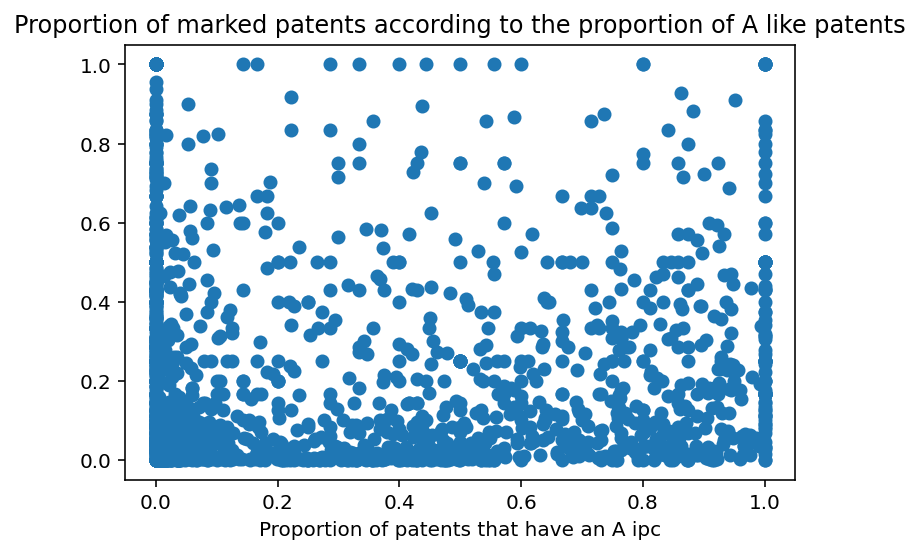

In [52]:
plt.scatter(reg_companies.proportion_A_ipc, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel("Proportion of patents that have an A ipc")
plt.title("Proportion of marked patents according to the proportion of A like patents")
plt.show()

Looks like we might search for a squared-polynomial dependency on A. 

In [85]:
A_data = reg_companies[["proportion_marked_patents", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
A_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
A_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
A_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
A_data["squared_proportion_A_ipc"] = (reg_companies.proportion_A_ipc)**2
A_data["cubic_proportion_A_ipc"] = (reg_companies.proportion_A_ipc)**3
A_data = sm.add_constant(A_data)
A_model = sm.OLS(A_data.proportion_marked_patents, A_data.drop('proportion_marked_patents', axis = 1))
result = A_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.367
Model:                                   OLS   Adj. R-squared:                  0.362
Method:                        Least Squares   F-statistic:                     163.1
Date:                       Tue, 01 Jun 2021   Prob (F-statistic):          2.47e-286
Time:                               18:20:40   Log-Likelihood:                 274.45
No. Observations:                       1695   AIC:                            -522.9
Df Residuals:                           1682   BIC:                            -452.2
Df Model:                                 12                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

<ipython-input-85-528a76b32442>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
<ipython-input-85-528a76b32442>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))


In conclusion, no polynomial dependency for A ipc

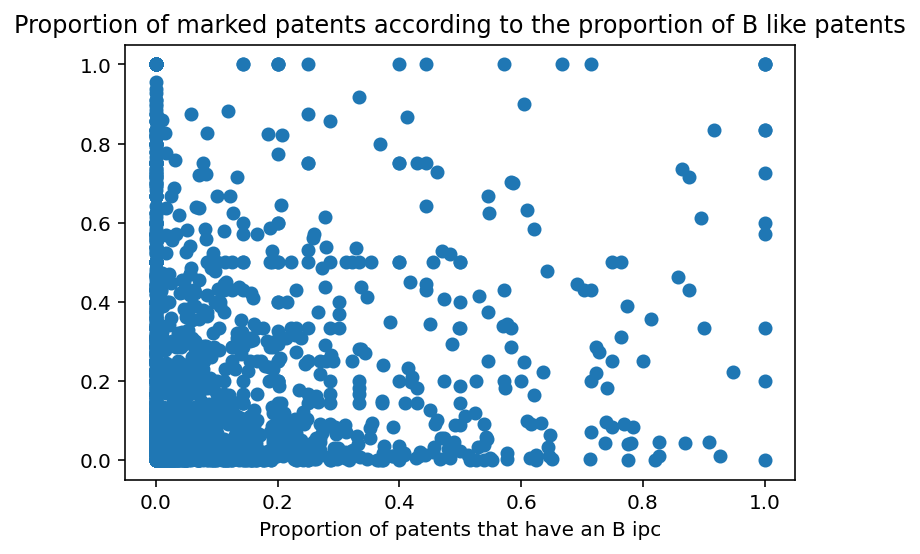

In [53]:
plt.scatter(reg_companies.proportion_B_ipc, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel("Proportion of patents that have an B ipc")
plt.title("Proportion of marked patents according to the proportion of B like patents")
plt.show()

Maybe here too even if the linear part should be more significant than the squared/cubic one. 

In [6]:
B_data = reg_companies[["proportion_marked_patents", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
B_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
B_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
B_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
B_data["squared_proportion_B_ipc"] = (reg_companies.proportion_B_ipc)**2
B_data["cubic_proportion_B_ipc"] = (reg_companies.proportion_B_ipc)**3
B_data = sm.add_constant(B_data)
B_model = sm.OLS(B_data.proportion_marked_patents, B_data.drop('proportion_marked_patents', axis = 1))
result = B_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.369
Model:                                   OLS   Adj. R-squared:                  0.365
Method:                        Least Squares   F-statistic:                     163.8
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):          2.60e-287
Time:                               09:00:23   Log-Likelihood:                 277.80
No. Observations:                       1695   AIC:                            -529.6
Df Residuals:                           1682   BIC:                            -458.9
Df Model:                                 12                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

<ipython-input-6-01c14c08238b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
<ipython-input-6-01c14c08238b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))


Polynomial dependency on B not significant

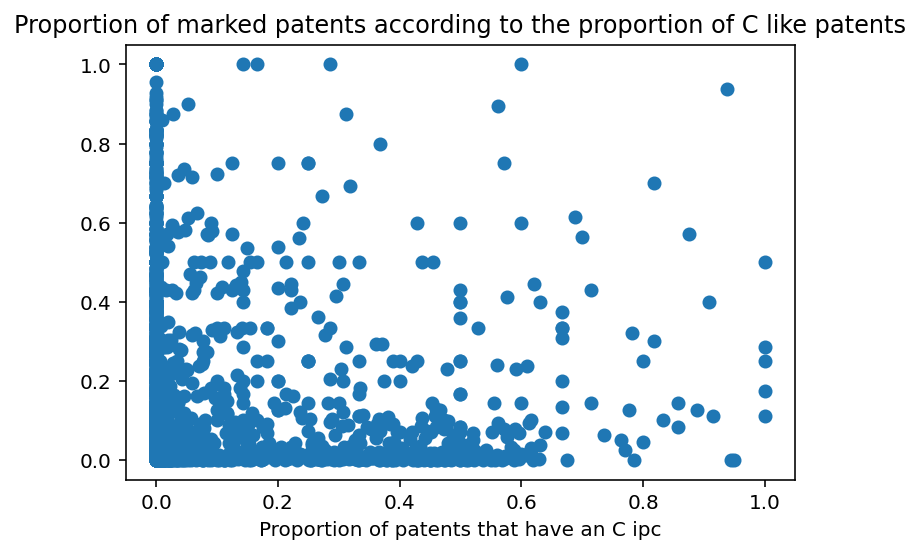

In [54]:
plt.scatter(reg_companies.proportion_C_ipc, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel("Proportion of patents that have an C ipc")
plt.title("Proportion of marked patents according to the proportion of C like patents")
plt.show()

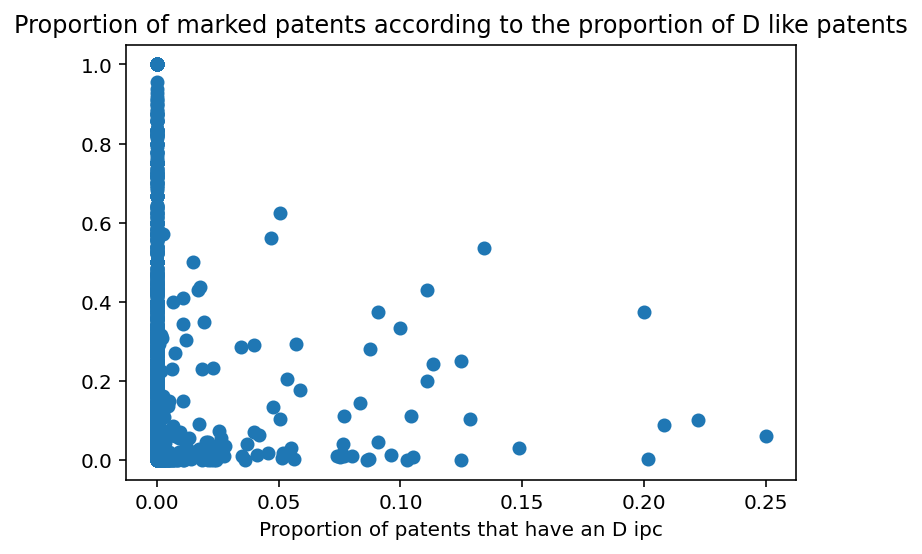

In [55]:
plt.scatter(reg_companies.proportion_D_ipc, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel("Proportion of patents that have an D ipc")
plt.title("Proportion of marked patents according to the proportion of D like patents")
plt.show()

As we might understand from the previous OLS, D does not seem to have a signficant influence over prop_marked_patents. 

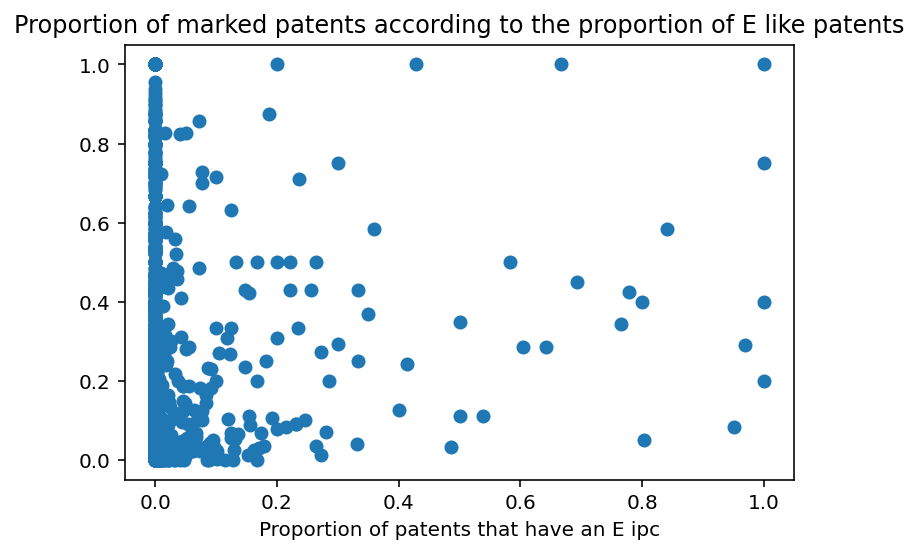

In [56]:
plt.scatter(reg_companies.proportion_E_ipc, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel("Proportion of patents that have an E ipc")
plt.title("Proportion of marked patents according to the proportion of E like patents")
plt.show()

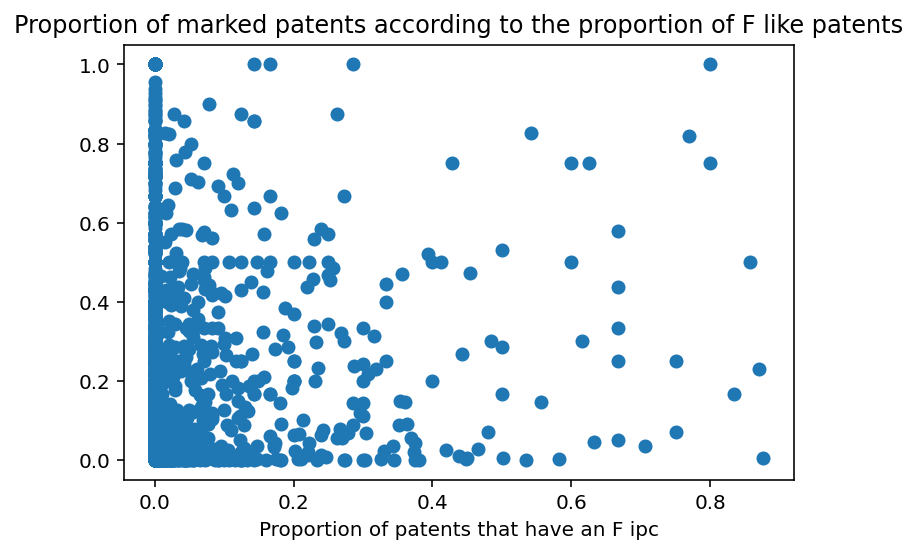

In [57]:
plt.scatter(reg_companies.proportion_F_ipc, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel("Proportion of patents that have an F ipc")
plt.title("Proportion of marked patents according to the proportion of F like patents")
plt.show()

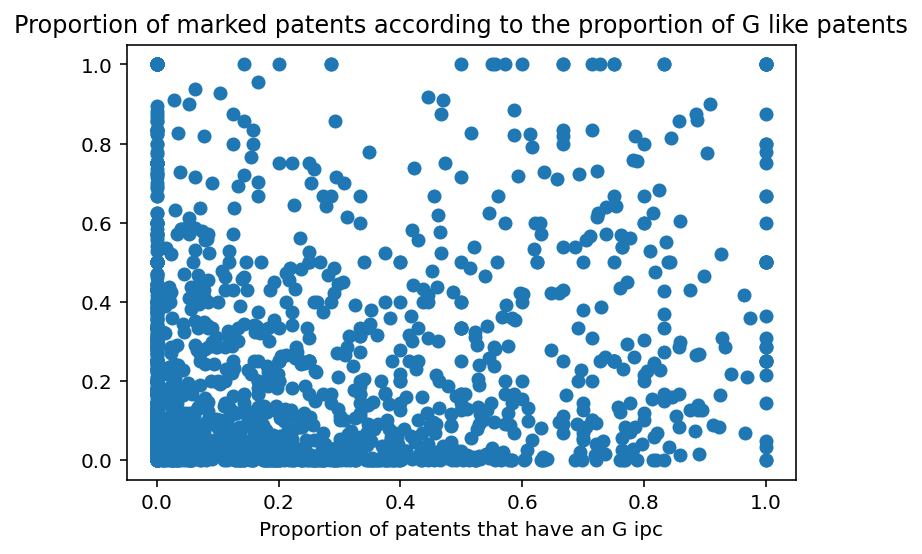

In [58]:
plt.scatter(reg_companies.proportion_G_ipc, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel("Proportion of patents that have an G ipc")
plt.title("Proportion of marked patents according to the proportion of G like patents")
plt.show()

In [12]:
G_data = reg_companies[["proportion_marked_patents", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
G_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
G_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
G_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
G_data["squared_proportion_G_ipc"] = (reg_companies.proportion_G_ipc)**2
G_data = sm.add_constant(G_data)
G_model = sm.OLS(G_data.proportion_marked_patents, G_data.drop('proportion_marked_patents', axis = 1))
result = G_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.368
Model:                                   OLS   Adj. R-squared:                  0.364
Method:                        Least Squares   F-statistic:                     176.9
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):          1.29e-287
Time:                               09:03:18   Log-Likelihood:                 275.84
No. Observations:                       1695   AIC:                            -527.7
Df Residuals:                           1683   BIC:                            -462.4
Df Model:                                 11                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

<ipython-input-12-6ccdac244488>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
<ipython-input-12-6ccdac244488>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))


Same conclusion here

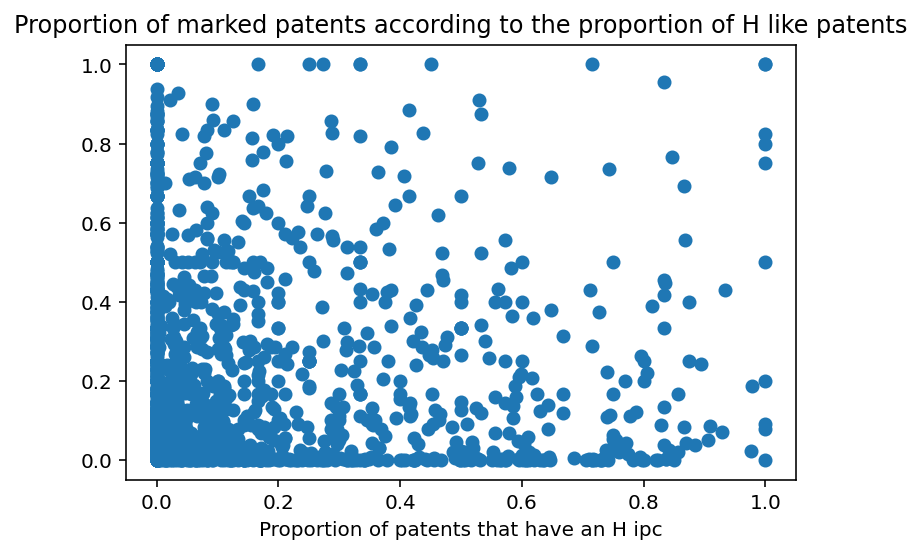

In [59]:
plt.scatter(reg_companies.proportion_H_ipc, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel("Proportion of patents that have an H ipc")
plt.title("Proportion of marked patents according to the proportion of H like patents")
plt.show()

### interaction terms ? 

In [113]:
median = reg_companies.assignee_total_num_inventors.describe()["50%"]
first_quart = reg_companies.assignee_total_num_inventors.describe()["25%"]
last_quart = reg_companies.assignee_total_num_inventors.describe()["75%"]
small_companies = reg_companies[reg_companies.assignee_total_num_inventors <= first_quart]
medium_companies = reg_companies[ (reg_companies.assignee_total_num_inventors <= last_quart) & (reg_companies.assignee_total_num_inventors > first_quart)]
big_companies = reg_companies[reg_companies.assignee_total_num_inventors > last_quart]

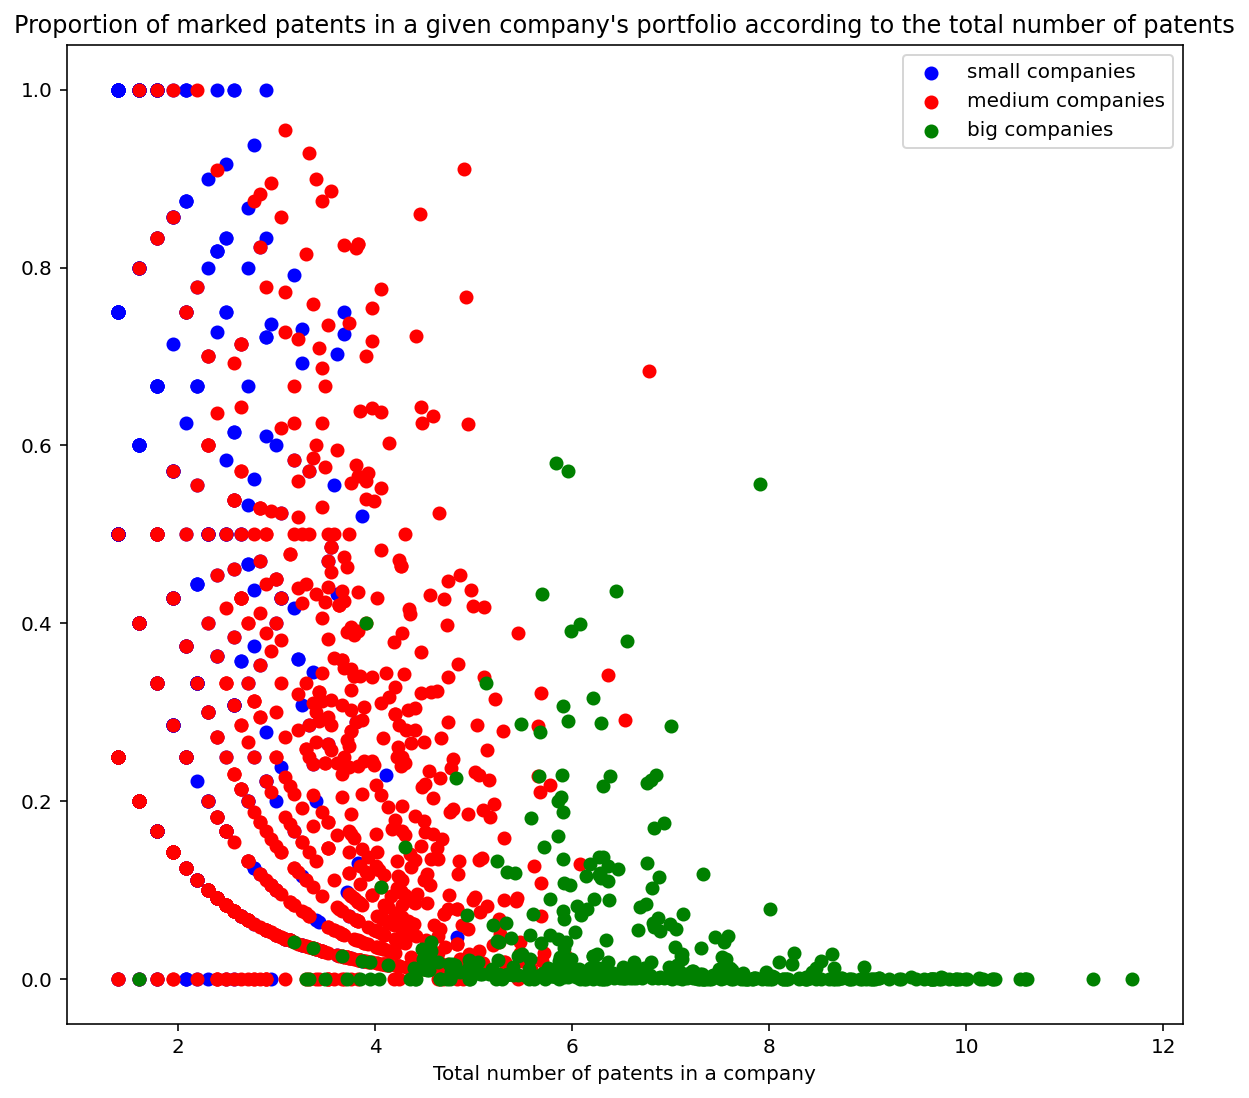

In [132]:
plt.scatter(np.log(small_companies.assignee_total_num_patents), small_companies.proportion_marked_patents, marker = 'o', color = 'b', label = 'small companies')
plt.scatter(np.log(medium_companies.assignee_total_num_patents), medium_companies.proportion_marked_patents, marker = 'o', color = 'r', label = 'medium companies')
plt.scatter(np.log(big_companies.assignee_total_num_patents), big_companies.proportion_marked_patents, marker = 'o', color = 'g', label = 'big companies')
plt.legend()
plt.xlabel("Total number of patents in a company")
plt.title("Proportion of marked patents in a given company's portfolio according to the total number of patents")
plt.rcParams["figure.figsize"] = (6,6)
plt.show()

The behaviour of the prop of marked patents by total number of patents seems to differ according to the "size" of the company. Moreover, in a logical thinking, one may wonder if a variation in inventors lead to a different influence of patents for marked since the more inventors you have, the more patents you should get. 

In [91]:
patinventors_data = reg_companies[["proportion_marked_patents", "proportion_A_ipc", "proportion_B_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
patinventors_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
patinventors_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
patinventors_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
patinventors_data["log(patents)*log(inventors)"] = np.log(reg_companies.assignee_total_num_patents)*np.log(reg_companies.assignee_total_num_inventors)
patinventors_data["sqrt(log(patents))*log(inventors)"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))*np.log(reg_companies.assignee_total_num_inventors)
patinventors_data = sm.add_constant(patinventors_data)
patinventors_model = sm.OLS(patinventors_data.proportion_marked_patents, patinventors_data.drop('proportion_marked_patents', axis = 1))
result = patinventors_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.370
Model:                                   OLS   Adj. R-squared:                  0.366
Method:                        Least Squares   F-statistic:                     123.6
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):          9.25e-221
Time:                               18:31:50   Log-Likelihood:                 278.98
No. Observations:                       1695   AIC:                            -532.0
Df Residuals:                           1682   BIC:                            -461.3
Df Model:                                 12                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

<ipython-input-91-4647fe94a8be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patinventors_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
<ipython-input-91-4647fe94a8be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patinventors_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
<ipython-input-91-4647fe94a8be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [41]:
hyp_1 = ("log(patents)*log(inventors) = 0, log_assignee_total_num_patents = 0")
hyp_2 = ("log(patents)*log(inventors) = 0, log_assignee_total_num_patents = 0, sqrt_log_assignee_total_num_patents = 0")
print('Hyp 1 : ', result.f_test(hyp_1))
print('Hyp 2 : ', result.f_test(hyp_2))

Hyp 1 :  <F test: F=array([[1.43656046]]), p=0.2380356284676158, df_denom=1.68e+03, df_num=2>
Hyp 2 :  <F test: F=array([[14.72486465]]), p=1.8197267828567888e-09, df_denom=1.68e+03, df_num=3>


In [24]:
patinventors_data = reg_companies[["proportion_marked_patents", "proportion_A_ipc", "proportion_B_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
patinventors_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
patinventors_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
patinventors_data["sqrt(log(patents))*log(inventors)"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))*np.log(reg_companies.assignee_total_num_inventors)
patinventors_data = sm.add_constant(patinventors_data)
patinventors_model = sm.OLS(patinventors_data.proportion_marked_patents, patinventors_data.drop('proportion_marked_patents', axis = 1))
result = patinventors_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.369
Model:                                   OLS   Adj. R-squared:                  0.366
Method:                        Least Squares   F-statistic:                     130.4
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):          1.61e-201
Time:                               14:05:39   Log-Likelihood:                 277.82
No. Observations:                       1695   AIC:                            -533.6
Df Residuals:                           1684   BIC:                            -473.8
Df Model:                                 10                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

<ipython-input-24-43344feb8f89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patinventors_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
<ipython-input-24-43344feb8f89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patinventors_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
<ipython-input-24-43344feb8f89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [133]:
patinventors_data = reg_companies[["proportion_marked_patents", "proportion_A_ipc", "proportion_B_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
patinventors_data["inv_log_assignee_total_num_patents"] = 1/(np.log(reg_companies.assignee_total_num_patents))
patinventors_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
patinventors_data["inv(log(patents))*log(inventors)"] = 1/(np.log(reg_companies.assignee_total_num_patents))*np.log(reg_companies.assignee_total_num_inventors)
patinventors_data = sm.add_constant(patinventors_data)
patinventors_model = sm.OLS(patinventors_data.proportion_marked_patents, patinventors_data.drop('proportion_marked_patents', axis = 1))
result = patinventors_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.369
Model:                                   OLS   Adj. R-squared:                  0.365
Method:                        Least Squares   F-statistic:                     121.6
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):          1.20e-190
Time:                               19:21:28   Log-Likelihood:                 276.95
No. Observations:                       1695   AIC:                            -531.9
Df Residuals:                           1684   BIC:                            -472.1
Df Model:                                 10                                         
Covariance Type:                         hc0                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

<ipython-input-133-0497f850a9da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patinventors_data["inv_log_assignee_total_num_patents"] = 1/(np.log(reg_companies.assignee_total_num_patents))
<ipython-input-133-0497f850a9da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patinventors_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
<ipython-input-133-0497f850a9da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [26]:
interaction_ipcs = reg_companies[["proportion_marked_patents", "proportion_A_ipc", "proportion_B_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
interaction_ipcs["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
interaction_ipcs["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
interaction_ipcs["sqrt(log(patents))*log(inventors)"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))*np.log(reg_companies.assignee_total_num_inventors)
interaction_ipcs["H_ipc*G_ipc"] = reg_companies.proportion_H_ipc*reg_companies.proportion_G_ipc
interaction_ipcs = sm.add_constant(interaction_ipcs)
interaction_ipcs_model = sm.OLS(interaction_ipcs.proportion_marked_patents, interaction_ipcs.drop('proportion_marked_patents', axis = 1))
result = interaction_ipcs_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.369
Model:                                   OLS   Adj. R-squared:                  0.365
Method:                        Least Squares   F-statistic:                     118.8
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):          7.03e-201
Time:                               14:13:53   Log-Likelihood:                 277.94
No. Observations:                       1695   AIC:                            -531.9
Df Residuals:                           1683   BIC:                            -466.7
Df Model:                                 11                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

<ipython-input-26-879e3ebd06d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interaction_ipcs["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
<ipython-input-26-879e3ebd06d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interaction_ipcs["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
<ipython-input-26-879e3ebd06d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [27]:
hyp = '(H_ipc*G_ipc = 0, proportion_H_ipc = 0)'
result.f_test(hyp)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[4.94274131]]), p=0.007238930948129696, df_denom=1.68e+03, df_num=2>

## look for countries effect

In [35]:
info_companies["assignee_lastknown_country"].unique()

array(['FR', 'JP', 'CA', 'US', 'IE', 'AU', 'DE', 'BE', 'AT', 'CN', 'GB',
       'unknown', 'CH', 'IT', 'BM', 'IL', 'FI', 'SE', 'TW', 'NO', 'KR',
       'NL', nan, 'LU', 'NZ', 'DK', 'SG', 'VG', 'ES', 'KY', 'PL', 'BB'],
      dtype=object)

In [61]:
country_info_companies = interest_info_companies.dropna(subset = ['assignee_lastknown_country'])
country_info_companies = country_info_companies[country_info_companies.assignee_lastknown_country != "unknown"]
country_info_companies.reset_index(drop = True, inplace = True)

In [62]:
countries = {'FR' : 'France', 'JP' : 'Japan', 'CA' : 'Canada', 'US' : 'USA', 'IE' : 'Ireland', 'AU' : 'Australia', 'DE' : 'Germany', 'BE' : 'Belgium', 'AT' : 'Austria', 'CN' : 'China', 'GB' : 'United Kingdom', 'CH' : 'Switzerland', 'IT' : 'Italy', 'BM' : 'Bermuda', 'IL' : 'Israel', 'FI' : 'Finland', 'SE' : 'Sweden', 'TW' : 'Taiwan', 'NO' : 'Norway', 'KR' : 'South Korea', 'NL' : 'Netherlands', 'LU' : 'Luxembourg', 'NZ' : 'New Zealand', 'DK' : 'Denmark', 'SG' : 'Singapore', 'VG' : 'Virgi Islands', 'ES' : 'Spain', 'KY' : 'Cayman Islands', 'PL' : 'Poland', 'BB' : 'Barbados'}
for k in range(len(country_info_companies)):
    country_info_companies.iat[k, 1] = countries[country_info_companies.iloc[k]["assignee_lastknown_country"]]
country_info_companies = pd.get_dummies(country_info_companies, columns = ['assignee_lastknown_country'], drop_first = True)

In [64]:
country_info_companies.columns

Index(['assignee_id', 'assignee_total_num_patents',
       'assignee_total_num_inventors', 'proportion_marked_patents',
       'proportion_multi_ipc', 'proportion_A_ipc', 'proportion_B_ipc',
       'proportion_C_ipc', 'proportion_D_ipc', 'proportion_E_ipc',
       'proportion_F_ipc', 'proportion_G_ipc', 'proportion_H_ipc',
       'assignee_lastknown_country_Austria',
       'assignee_lastknown_country_Barbados',
       'assignee_lastknown_country_Belgium',
       'assignee_lastknown_country_Bermuda',
       'assignee_lastknown_country_Canada',
       'assignee_lastknown_country_Cayman Islands',
       'assignee_lastknown_country_China',
       'assignee_lastknown_country_Denmark',
       'assignee_lastknown_country_Finland',
       'assignee_lastknown_country_France',
       'assignee_lastknown_country_Germany',
       'assignee_lastknown_country_Ireland',
       'assignee_lastknown_country_Israel', 'assignee_lastknown_country_Italy',
       'assignee_lastknown_country_Japan',
       '

In [92]:
country_data = country_info_companies[list(country_info_companies.columns[3:].values)]
country_data.drop(columns = ["proportion_multi_ipc", "proportion_C_ipc"], inplace = True)
country_data["inv_log_assignee_total_num_patents"] = 1/(np.log(country_info_companies.assignee_total_num_patents))
country_data["log_assignee_total_num_inventors"] = np.log(country_info_companies.assignee_total_num_inventors)
country_data["inv(log(patents))*log(inventors)"] = 1/(np.log(country_info_companies.assignee_total_num_patents))*np.log(country_info_companies.assignee_total_num_inventors)
country_data = sm.add_constant(country_data)
country_model = sm.OLS(country_data.proportion_marked_patents, country_data.drop('proportion_marked_patents', axis = 1))
result = country_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.383
Model:                                   OLS   Adj. R-squared:                  0.369
Method:                        Least Squares   F-statistic:                     17.61
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):           1.82e-91
Time:                               18:32:41   Log-Likelihood:                 293.54
No. Observations:                       1682   AIC:                            -507.1
Df Residuals:                           1642   BIC:                            -290.0
Df Model:                                 39                                         
Covariance Type:                         hc0                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-92-8017fb61a0be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data["inv_log_assignee_total_num_patents"] = 1/(np.log(country_info_companies.assignee_total_num_patents))
<ipython-input-92-8017fb61a0be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [69]:
hyp = '(assignee_lastknown_country_Austria = 0, assignee_lastknown_country_Finland = 0, assignee_lastknown_country_France = 0, assignee_lastknown_country_Germany = 0, assignee_lastknown_country_Italy = 0, assignee_lastknown_country_Japan = 0, assignee_lastknown_country_South Korea = 0, assignee_lastknown_country_Spain = 0, assignee_lastknown_country_Taiwan = 0, assignee_lastknown_country_United Kingdom = 0)'
result.f_test(hyp)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.76252239]]), p=0.6653075987764915, df_denom=1.64e+03, df_num=10>

In [70]:
country_data.drop(columns = ["assignee_lastknown_country_Austria", "assignee_lastknown_country_Finland", "assignee_lastknown_country_France", "assignee_lastknown_country_Germany", "assignee_lastknown_country_Italy", "assignee_lastknown_country_Japan", "assignee_lastknown_country_South Korea", "assignee_lastknown_country_Spain", "assignee_lastknown_country_Taiwan", "assignee_lastknown_country_United Kingdom"], inplace = True)

In [71]:
new_country_model = sm.OLS(country_data.proportion_marked_patents, country_data.drop('proportion_marked_patents', axis = 1))
result = new_country_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.384
Model:                                   OLS   Adj. R-squared:                  0.373
Method:                        Least Squares   F-statistic:                     20.37
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):           4.51e-84
Time:                               15:05:50   Log-Likelihood:                 294.73
No. Observations:                       1682   AIC:                            -529.5
Df Residuals:                           1652   BIC:                            -366.6
Df Model:                                 29                                         
Covariance Type:                         hc0                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 29, but rank is 27
  warnings.warn('covariance of constraints does not have full '


In [74]:
hyp = 'assignee_lastknown_country_Belgium = 0, assignee_lastknown_country_Bermuda = 0, assignee_lastknown_country_China = 0, assignee_lastknown_country_Denmark = 0, assignee_lastknown_country_Ireland = 0, assignee_lastknown_country_Israel = 0, assignee_lastknown_country_Norway = 0, assignee_lastknown_country_Luxembourg = 0, assignee_lastknown_country_Netherlands = 0, assignee_lastknown_country_Singapore = 0, assignee_lastknown_country_Switzerland = 0'
result.f_test(hyp)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[1.49483013]]), p=0.12670338268503772, df_denom=1.65e+03, df_num=11>

In [75]:
country_data.drop(columns = ["assignee_lastknown_country_Belgium", "assignee_lastknown_country_Bermuda", "assignee_lastknown_country_China", "assignee_lastknown_country_Denmark", "assignee_lastknown_country_Ireland", "assignee_lastknown_country_Israel", "assignee_lastknown_country_Norway", "assignee_lastknown_country_Luxembourg", "assignee_lastknown_country_Netherlands", "assignee_lastknown_country_Singapore", "assignee_lastknown_country_Switzerland"], inplace = True)

In [76]:
second_new_country_model = sm.OLS(country_data.proportion_marked_patents, country_data.drop('proportion_marked_patents', axis = 1))
result = second_new_country_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.378
Model:                                   OLS   Adj. R-squared:                  0.372
Method:                        Least Squares   F-statistic:                     33.02
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):           6.63e-88
Time:                               15:15:07   Log-Likelihood:                 286.88
No. Observations:                       1682   AIC:                            -535.8
Df Residuals:                           1663   BIC:                            -432.6
Df Model:                                 18                                         
Covariance Type:                         hc0                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 16
  warnings.warn('covariance of constraints does not have full '


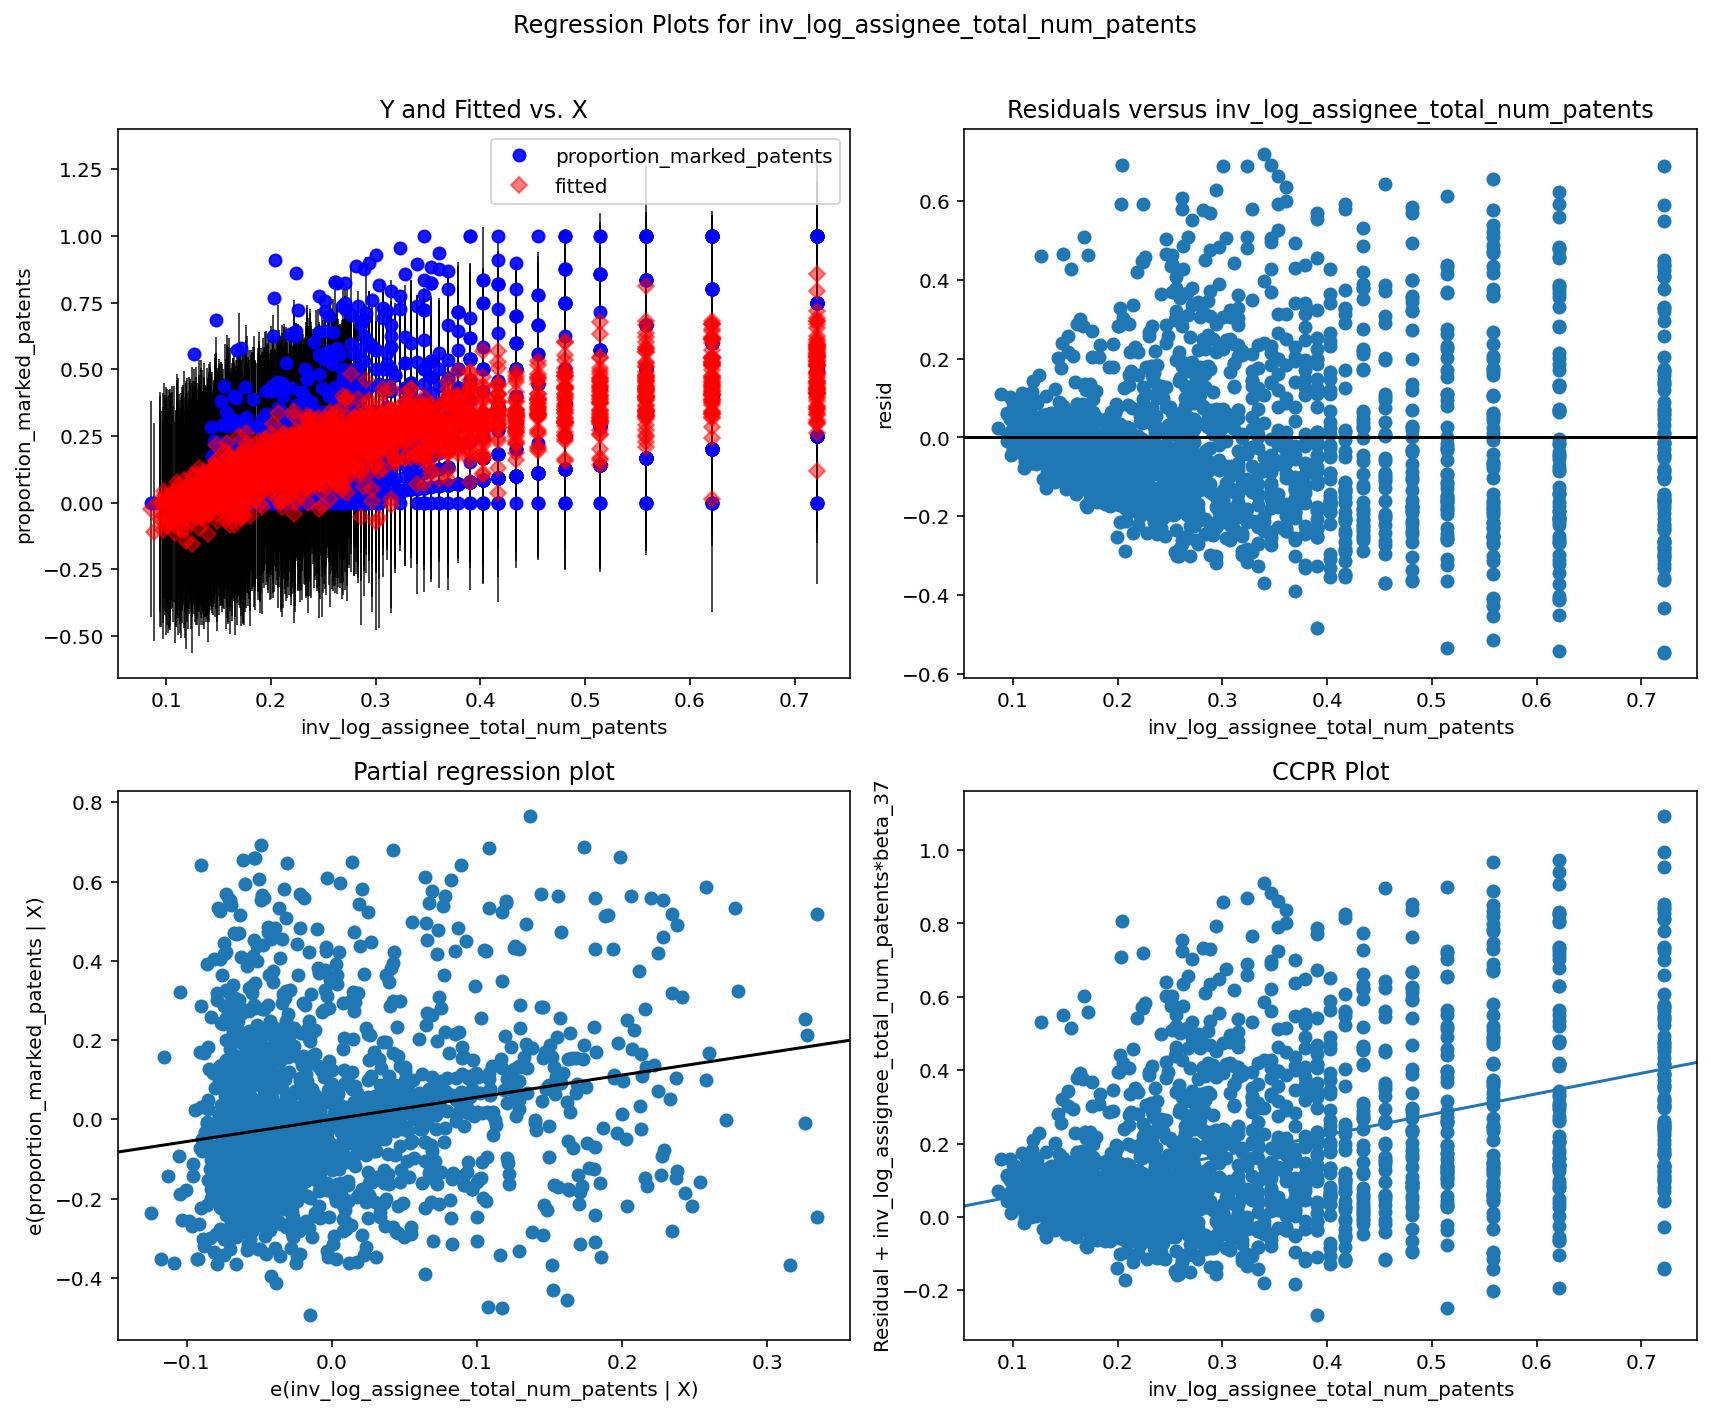

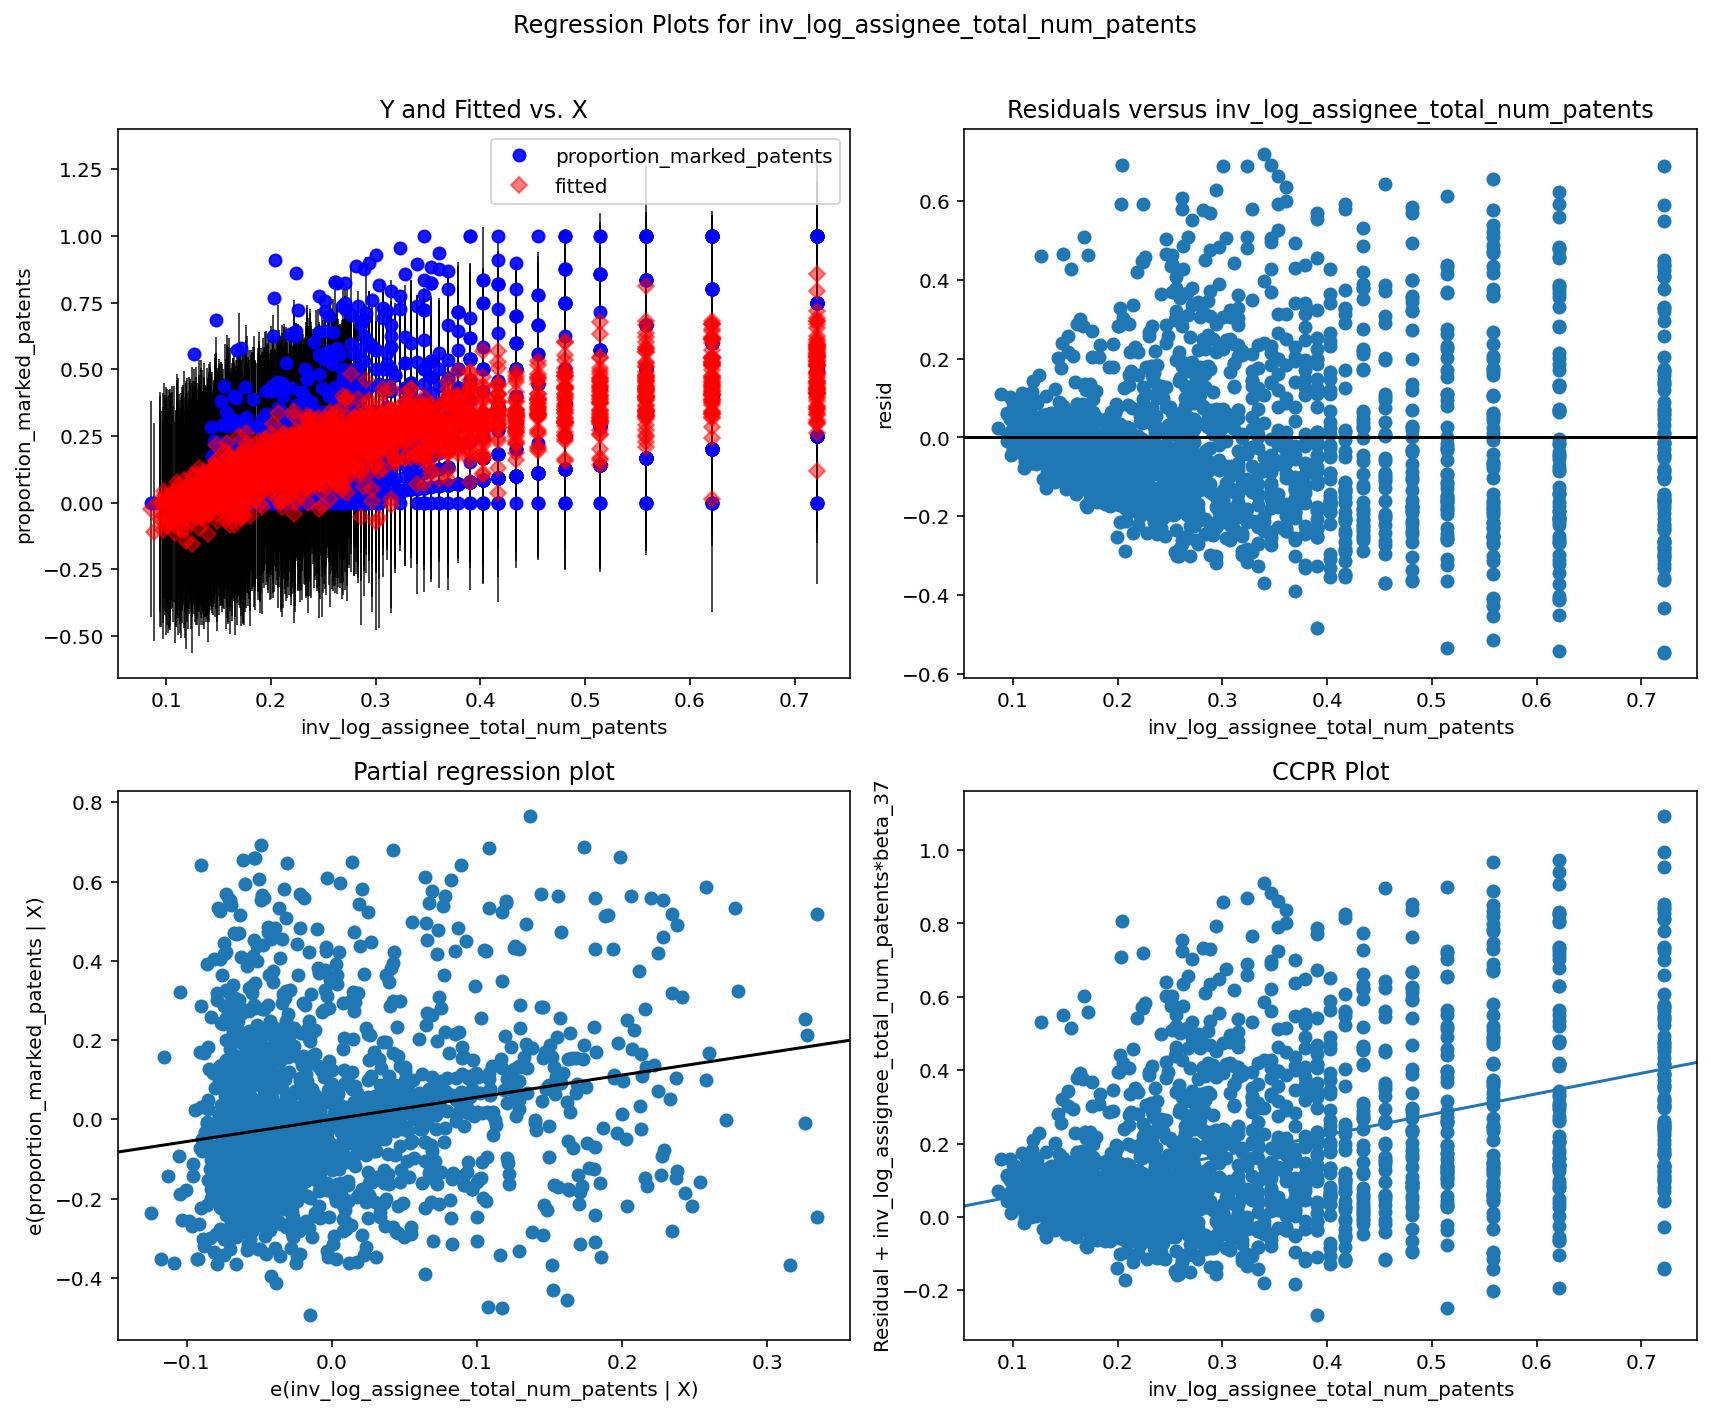

In [94]:
fig = plt.figure(figsize = (12,10))
sm.graphics.plot_regress_exog(result, 'inv_log_assignee_total_num_patents', fig = fig)

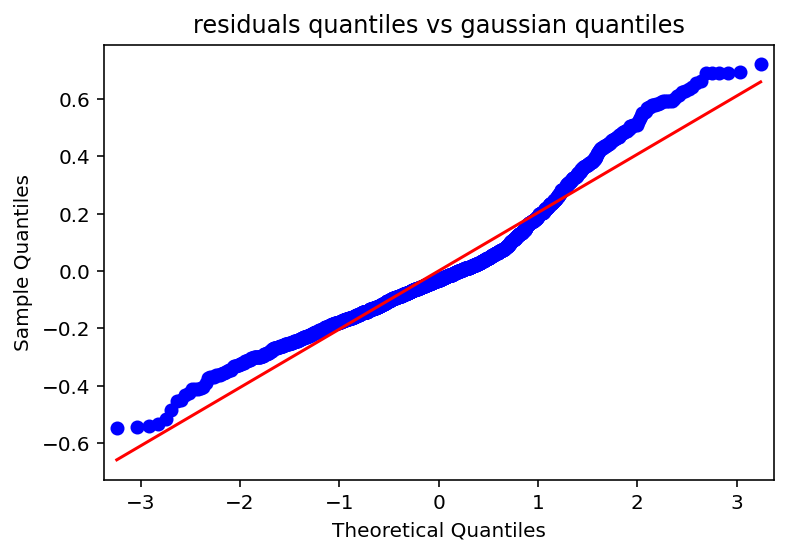

ShapiroResult(statistic=0.9490622282028198, pvalue=1.0605998212424937e-23)


In [100]:
import pylab
sm.qqplot(result.resid, line = 's')
plt.title("residuals quantiles vs gaussian quantiles")
pylab.show()
print(stats.shapiro(result.resid))

## solve multicollinearity problems

In [9]:
vif = pd.DataFrame()
reg_copy = reg_companies.copy()
reg_copy = sm.add_constant(reg_copy)
vif["variables"] = reg_copy.columns
vif["VIF"] = [variance_inflation_factor(reg_copy.values, i) for i in range(reg_copy.shape[1])]
vif

C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\User\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,const,0.000000
1,assignee_total_num_patents,8.318907
2,assignee_total_num_inventors,8.425058
3,proportion_marked_patents,1.123104
4,proportion_multi_ipc,1.126157
5,proportion_A_ipc,inf
6,proportion_B_ipc,inf
7,proportion_C_ipc,inf
8,proportion_D_ipc,inf
9,proportion_E_ipc,inf


In [12]:
vif = pd.DataFrame()
reg_copy = reg_companies_centered.copy()
reg_copy.drop('proportion_C_ipc', axis = 1, inplace = True)
reg_copy = sm.add_constant(reg_copy)
vif["variables"] = reg_copy.columns
vif["VIF"] = [variance_inflation_factor(reg_copy.values, i) for i in range(reg_copy.shape[1])]
vif

,variables,VIF
0,const,1.000000
1,assignee_total_num_patents,8.318907
2,assignee_total_num_inventors,8.425058
3,proportion_marked_patents,1.123104
4,proportion_multi_ipc,1.126157
5,proportion_A_ipc,4.663878
6,proportion_B_ipc,2.067773
7,proportion_D_ipc,1.055092
8,proportion_E_ipc,1.246908
9,proportion_F_ipc,1.276341


In [13]:
model = sm.OLS(reg_copy.proportion_marked_patents, reg_copy.drop('proportion_marked_patents', axis = 1))
result = model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.110
Model:                                   OLS   Adj. R-squared:                  0.104
Method:                        Least Squares   F-statistic:                     21.24
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):           1.25e-37
Time:                               13:58:25   Log-Likelihood:                -14.383
No. Observations:                       1695   AIC:                             50.77
Df Residuals:                           1684   BIC:                             110.6
Df Model:                                 10                                         
Covariance Type:                         hc0                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

In [134]:
country_data = country_info_companies[list(country_info_companies.columns[3:].values)]
country_data.drop(columns = ["proportion_multi_ipc", "proportion_C_ipc"], inplace = True)
country_data["inv_log_assignee_total_num_patents"] = 1/(np.log(country_info_companies.assignee_total_num_patents))
country_data["log_assignee_total_num_inventors"] = np.log(country_info_companies.assignee_total_num_inventors)
country_data["inv(log(patents))*log(inventors)"] = 1/(np.log(country_info_companies.assignee_total_num_patents))*np.log(country_info_companies.assignee_total_num_inventors)
country_data = sm.add_constant(country_data)
country_model = sm.OLS(country_data.proportion_marked_patents, country_data.drop('proportion_marked_patents', axis = 1))
result = country_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.383
Model:                                   OLS   Adj. R-squared:                  0.369
Method:                        Least Squares   F-statistic:                     17.61
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):           1.82e-91
Time:                               19:23:18   Log-Likelihood:                 293.54
No. Observations:                       1682   AIC:                            -507.1
Df Residuals:                           1642   BIC:                            -290.0
Df Model:                                 39                                         
Covariance Type:                         hc0                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-134-8017fb61a0be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data["inv_log_assignee_total_num_patents"] = 1/(np.log(country_info_companies.assignee_total_num_patents))
<ipython-input-134-8017fb61a0be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [135]:
country_data.drop(columns = ["assignee_lastknown_country_Austria", "assignee_lastknown_country_Finland", "assignee_lastknown_country_France", "assignee_lastknown_country_Germany", "assignee_lastknown_country_Italy", "assignee_lastknown_country_Japan", "assignee_lastknown_country_South Korea", "assignee_lastknown_country_Spain", "assignee_lastknown_country_Taiwan", "assignee_lastknown_country_United Kingdom"], inplace = True)
country_data.drop(columns = ["assignee_lastknown_country_Belgium", "assignee_lastknown_country_Bermuda", "assignee_lastknown_country_China", "assignee_lastknown_country_Denmark", "assignee_lastknown_country_Ireland", "assignee_lastknown_country_Israel", "assignee_lastknown_country_Norway", "assignee_lastknown_country_Luxembourg", "assignee_lastknown_country_Netherlands", "assignee_lastknown_country_Singapore", "assignee_lastknown_country_Switzerland"], inplace = True)
second_new_country_model = sm.OLS(country_data.proportion_marked_patents, country_data.drop('proportion_marked_patents', axis = 1))
result = second_new_country_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.377
Model:                                   OLS   Adj. R-squared:                  0.370
Method:                        Least Squares   F-statistic:                     34.14
Date:                       Wed, 02 Jun 2021   Prob (F-statistic):           8.79e-91
Time:                               19:24:03   Log-Likelihood:                 285.18
No. Observations:                       1682   AIC:                            -532.4
Df Residuals:                           1663   BIC:                            -429.2
Df Model:                                 18                                         
Covariance Type:                         hc0                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 16
  warnings.warn('covariance of constraints does not have full '


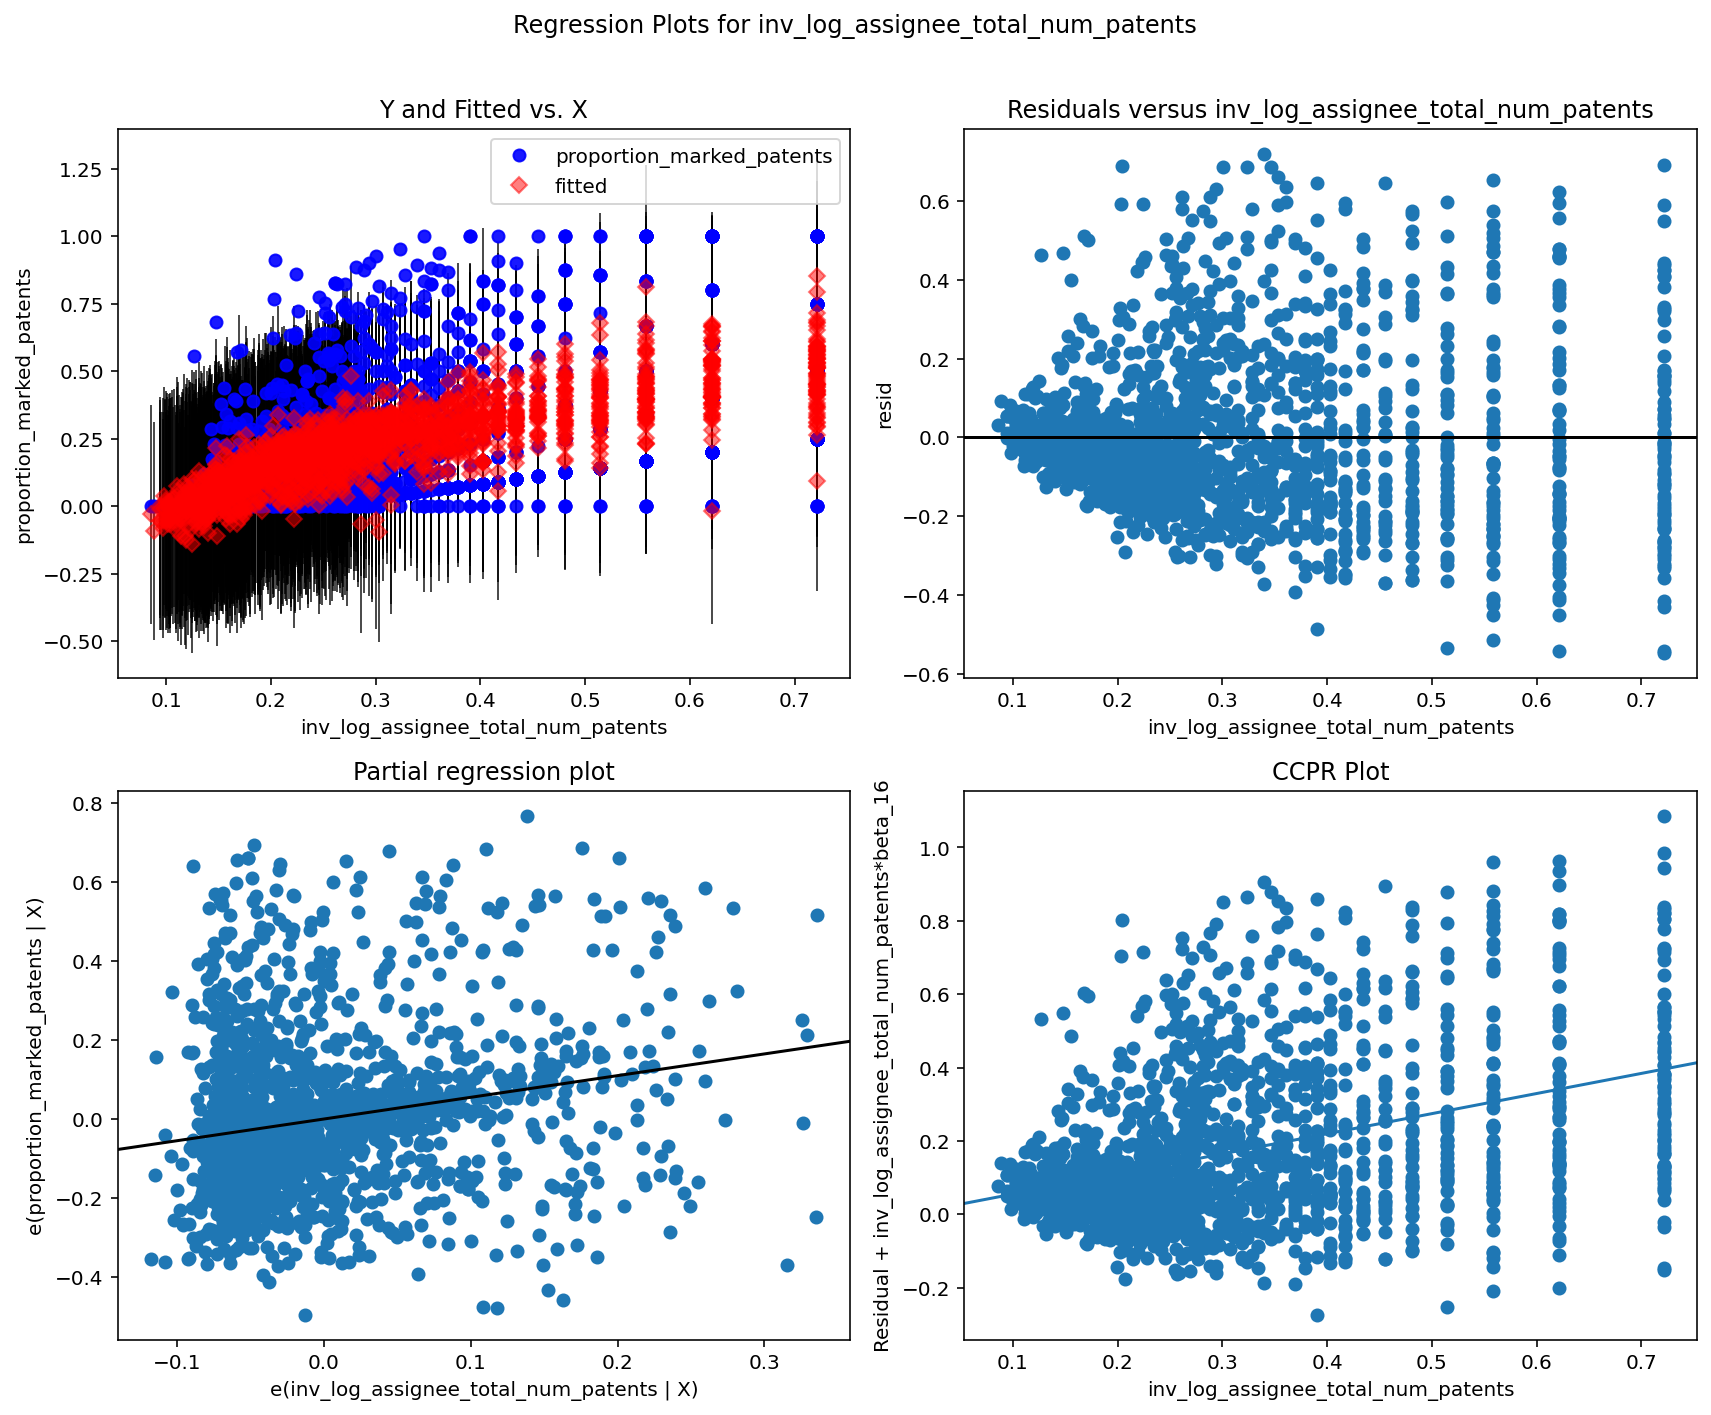

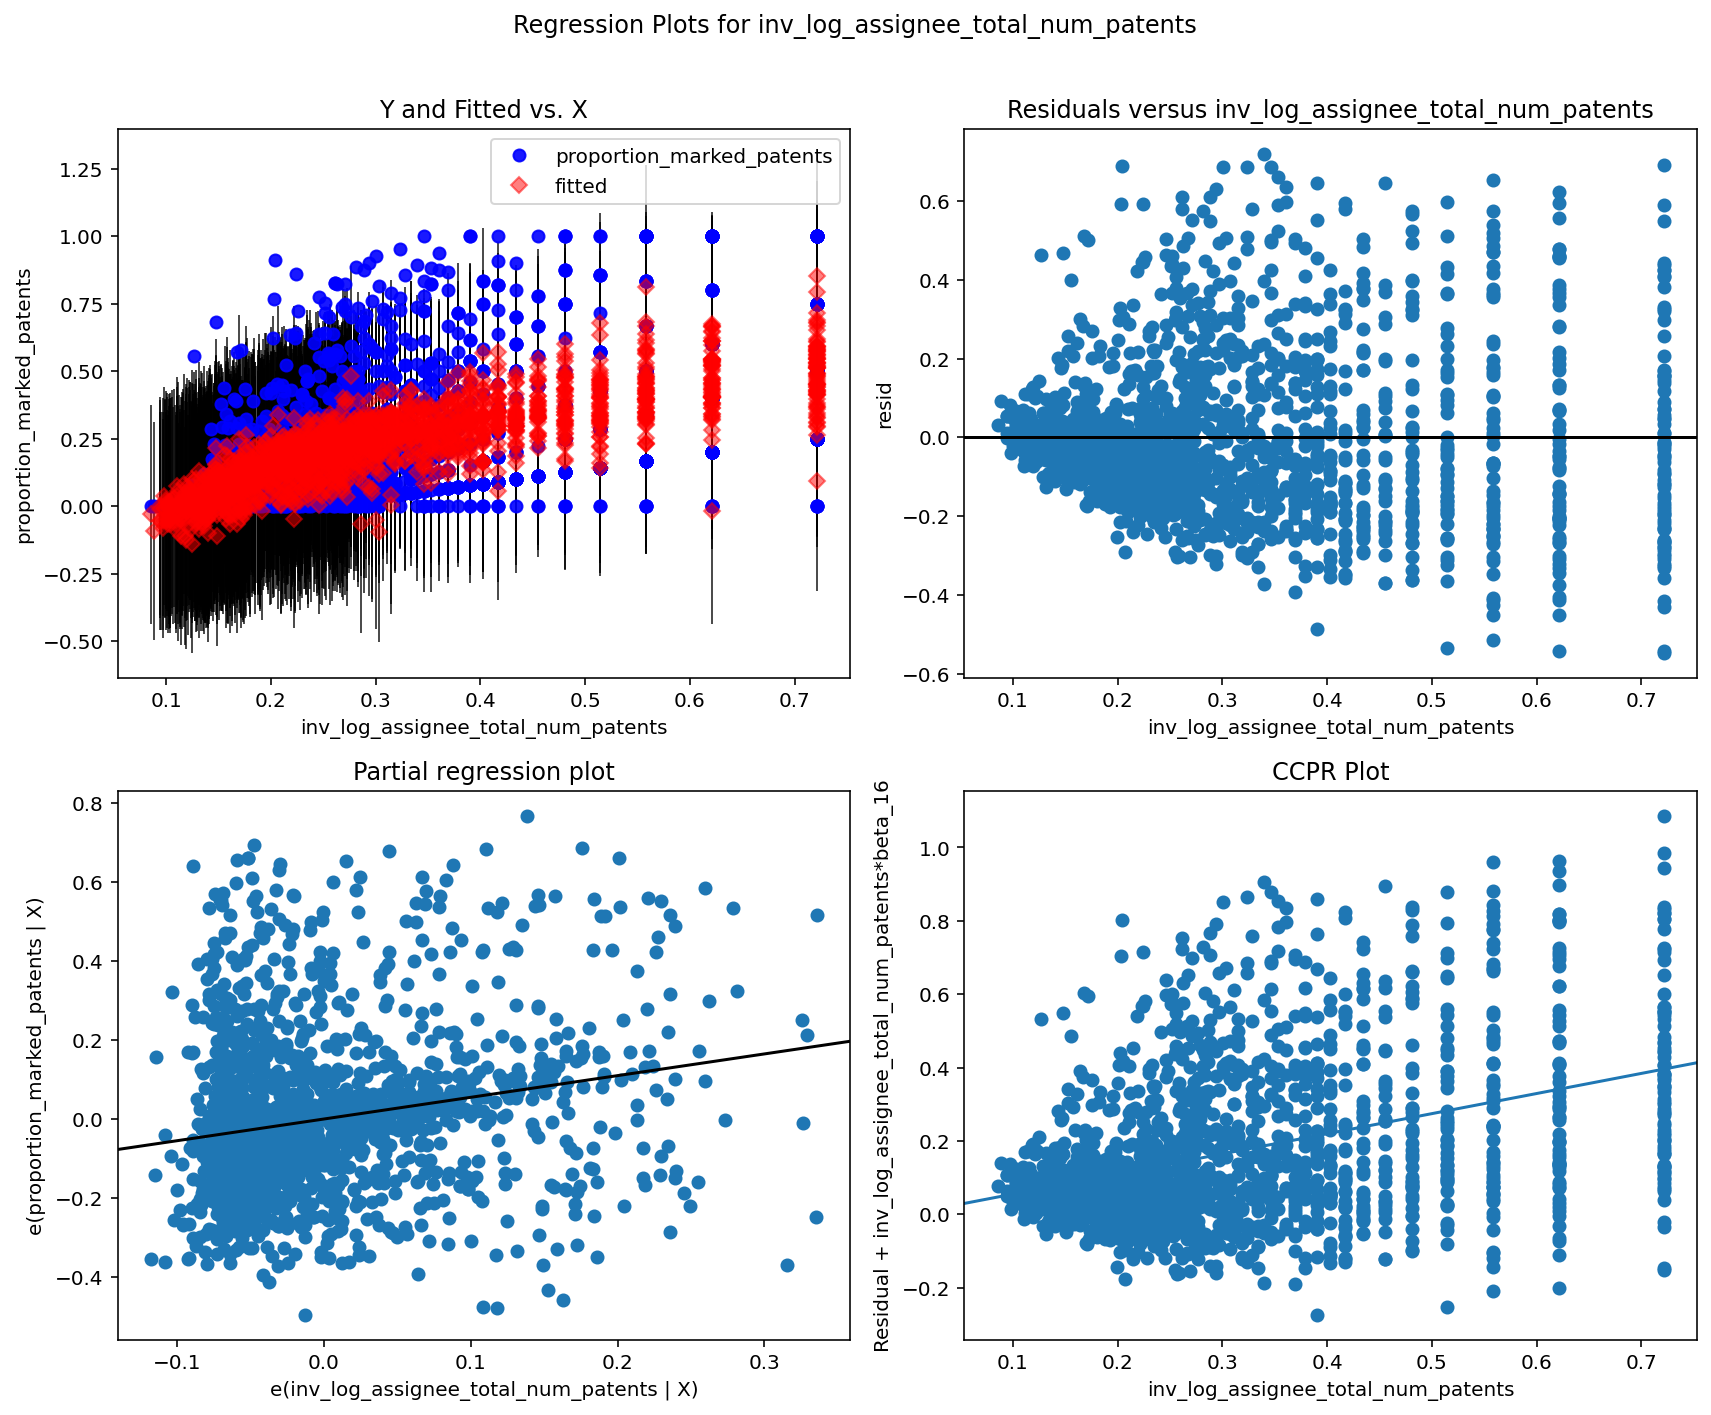

In [136]:
fig = plt.figure(figsize = (12,10))
sm.graphics.plot_regress_exog(result, 'inv_log_assignee_total_num_patents', fig = fig)

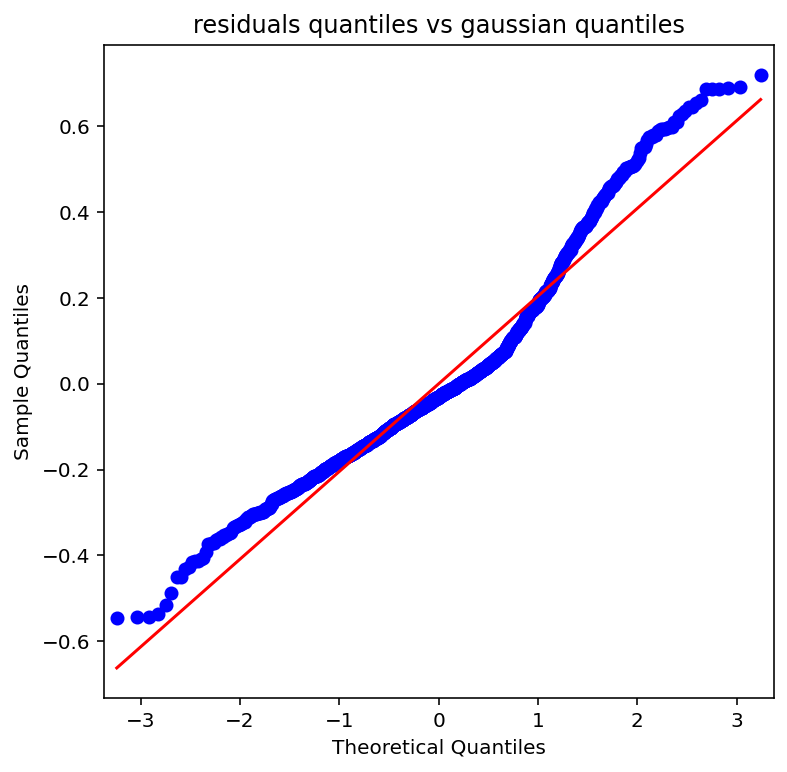

ShapiroResult(statistic=0.9469343423843384, pvalue=3.724602819696481e-24)


In [137]:
import pylab
sm.qqplot(result.resid, line = 's')
plt.title("residuals quantiles vs gaussian quantiles")
pylab.show()
print(stats.shapiro(result.resid))